In [ ]:
import tensorflow as tf

In [ ]:
def Conv2D_Block(input_tensor , n_filters):
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  return x

In [ ]:
def U_Net(img_tensor , n_filters = 16):

  conv1 = Conv2D_Block(img_tensor , n_filters * 1)
  pool1 = tf.keras.layers.MaxPooling2D((2 , 2))(conv1)
  pool1 = tf.keras.layers.Dropout(0.05)(pool1)

  conv2 = Conv2D_Block(pool1 , n_filters * 2)
  pool2 = tf.keras.layers.MaxPooling2D((2 , 2))(conv2)
  pool2 = tf.keras.layers.Dropout(0.05)(pool2)

  conv3 = Conv2D_Block(pool2 , n_filters * 4)
  pool3 = tf.keras.layers.MaxPooling2D((2 , 2))(conv3)
  pool3 = tf.keras.layers.Dropout(0.05)(pool3)

  conv4 = Conv2D_Block(pool3 , n_filters * 8)
  pool4 = tf.keras.layers.MaxPooling2D((2 , 2))(conv4)
  pool4 = tf.keras.layers.Dropout(0.05)(pool4)

  conv5 = Conv2D_Block(pool4 , n_filters * 16)

  pool6 = tf.keras.layers.Conv2DTranspose(n_filters * 8 , (3 , 3) , (2, 2) , padding = 'same')(conv5)
  pool6 = tf.keras.layers.concatenate([pool6 , conv4])
  pool6 = tf.keras.layers.Dropout(0.05)(pool6)
  conv6 = Conv2D_Block(pool6 , n_filters * 8)

  pool7 = tf.keras.layers.Conv2DTranspose(n_filters * 4 , (3 , 3) , (2 , 2) , padding = 'same')(conv6)
  pool7 = tf.keras.layers.concatenate([pool7 , conv3])
  pool7 = tf.keras.layers.Dropout(0.05)(pool7)
  conv7 = Conv2D_Block(pool7 , n_filters * 4)

  pool8 = tf.keras.layers.Conv2DTranspose(n_filters * 2 , (3 , 3) , (2 , 2) , padding = 'same')(conv7)
  pool8 = tf.keras.layers.concatenate([pool8 , conv2])
  pool8 = tf.keras.layers.Dropout(0.05)(pool8)
  conv8 = Conv2D_Block(pool8 , n_filters * 2)

  pool9 = tf.keras.layers.Conv2DTranspose(n_filters * 1 , (3 , 3) , (2 , 2) , padding = 'same')(conv8)
  pool9 = tf.keras.layers.concatenate([pool9 , conv1])
  pool9 = tf.keras.layers.Dropout(0.05)(pool9)
  conv9 = Conv2D_Block(pool9 , n_filters * 1)

  output = tf.keras.layers.Conv2D(1 , (1 , 1) , activation = 'sigmoid')(conv9)

  u_net = tf.keras.Model(inputs = [img_tensor] , outputs = [output])

  return u_net

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikithamatta","key":"10a9a62749ce944f8e8037512c512da2"}'}

In [ ]:
!kaggle competitions download -c ultrasound-nerve-segmentation

100% 2.11G/2.11G [02:09<00:00, 21.0MB/s]
100% 2.11G/2.11G [02:09<00:00, 17.5MB/s]


In [ ]:
!unzip ultrasound-nerve-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train_masks.csv')

In [ ]:
df.head()

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [ ]:
import os
import re

In [ ]:
train_path = os.listdir('/content/train/')
test_path = os.listdir('/content/test/')

print(len(train_path) , len(test_path))

11270 5508


In [ ]:
reg = re.compile("[0-9]+")

temp1 = list(map(lambda x: reg.match(x).group(), train_path))
temp1 = list(map(int, temp1))

temp2 = list(map(lambda x: reg.match(x.split("_")[1]).group(), train_path))
temp2 = list(map(int, temp2))

train_path = [x for _,_,x in sorted(zip(temp1, temp2, train_path))]
train_path[:20]

['1_1.tif',
 '1_1_mask.tif',
 '1_2.tif',
 '1_2_mask.tif',
 '1_3.tif',
 '1_3_mask.tif',
 '1_4.tif',
 '1_4_mask.tif',
 '1_5.tif',
 '1_5_mask.tif',
 '1_6.tif',
 '1_6_mask.tif',
 '1_7.tif',
 '1_7_mask.tif',
 '1_8.tif',
 '1_8_mask.tif',
 '1_9.tif',
 '1_9_mask.tif',
 '1_10.tif',
 '1_10_mask.tif']

In [ ]:
len(train_path)

11270

In [ ]:
train_image = []
train_mask = []

for index , item in enumerate(train_path):
  if index % 2 == 0:
    train_image.append(item)
  else:
    train_mask.append(item)

In [ ]:
print(len(train_image))
print(len(train_mask))

5635
5635


In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import skimage

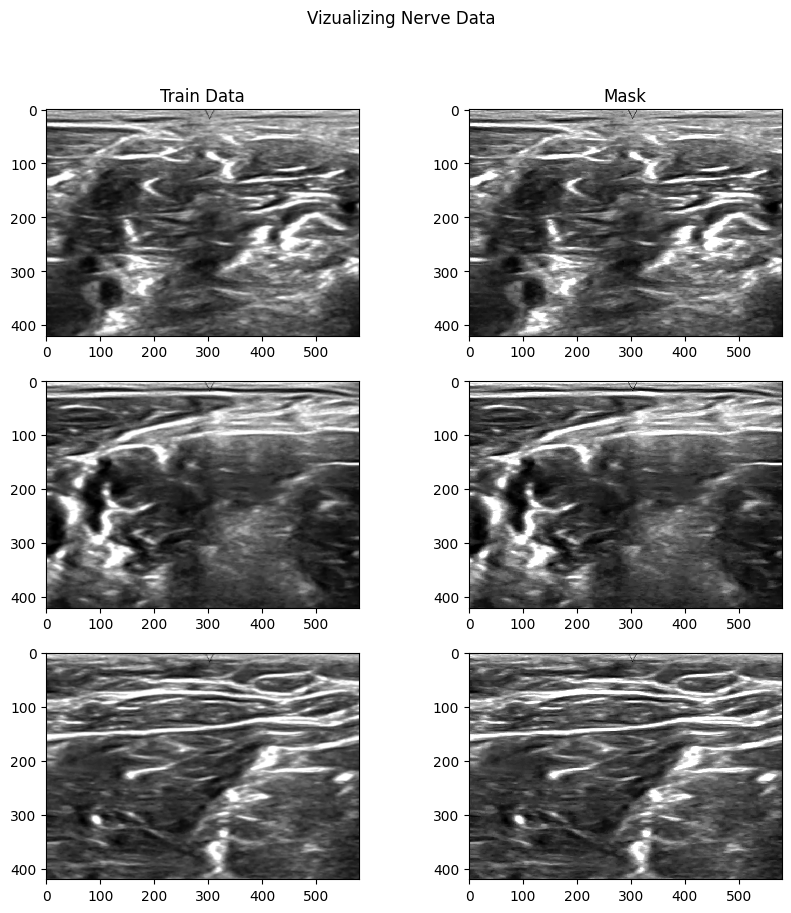

In [ ]:
fig , ax = plt.subplots(3 , 2 , figsize=[10 , 10])
fig.suptitle('Vizualizing Nerve Data')
ax[0 , 0].set_title('Train Data')
ax[0 , 1].set_title('Mask')

# print(ax.shape)
for i in range(0 , 3):
  ind = random.randint(0 , len(train_image))
  img1 = np.array(Image.open("/content/train/" + str(train_image[ind])))
  ax[i , 0].imshow(img1 , cmap = 'gray')

  img2 = np.array(Image.open("/content/train/" + str(train_mask[ind])))
  img2 = np.ma.masked_where(img2 == 0, img2)
  ax[i , 1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()

In [ ]:
X = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)
y = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)

In [ ]:
for n , img_name in enumerate(train_image):
  img = tf.keras.preprocessing.image.load_img('/content/train/'+img_name , color_mode="grayscale")
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  X[n] = in_img / 255.0

for n , img_name in enumerate(train_mask):
  img = tf.keras.preprocessing.image.load_img('/content/train/'+img_name , color_mode="grayscale")
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  y[n] = in_img / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [ ]:
img_tensor = tf.keras.layers.Input((128 , 128 , 1) , name = 'img')
model = U_Net(img_tensor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         160       ['img[0][0]']                 
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 16)         0         ['batch_normalization[0][0

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model_nerve.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [ ]:
results = model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

Epoch 1/50
159/159 [==============================] - ETA: 0s - loss: 0.2285 - accuracy: 0.9588
Epoch 1: val_loss improved from inf to 0.18621, saving model to model_nerve.h5
159/159 [==============================] - 54s 176ms/step - loss: 0.2285 - accuracy: 0.9588 - val_loss: 0.1862 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 2/50
159/159 [==============================] - ETA: 0s - loss: 0.0893 - accuracy: 0.9833
Epoch 2: val_loss improved from 0.18621 to 0.07705, saving model to model_nerve.h5
159/159 [==============================] - 21s 133ms/step - loss: 0.0893 - accuracy: 0.9833 - val_loss: 0.0770 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 3/50
159/159 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9848
Epoch 3: val_loss improved from 0.07705 to 0.05292, saving model to model_nerve.h5
159/159 [==============================] - 22s 135ms/step - loss: 0.0531 - accuracy: 0.9848 - val_loss: 0.0529 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 4/50
159/159 [======

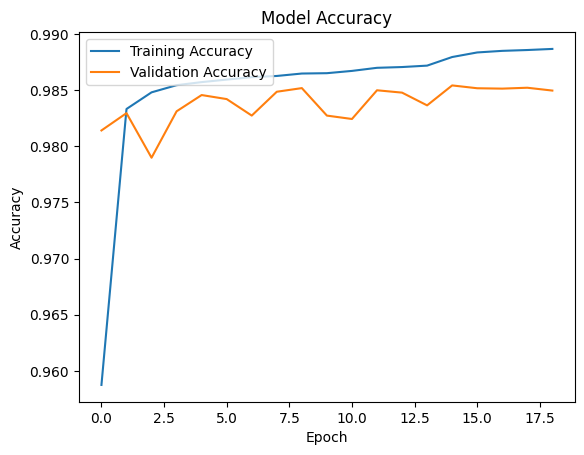

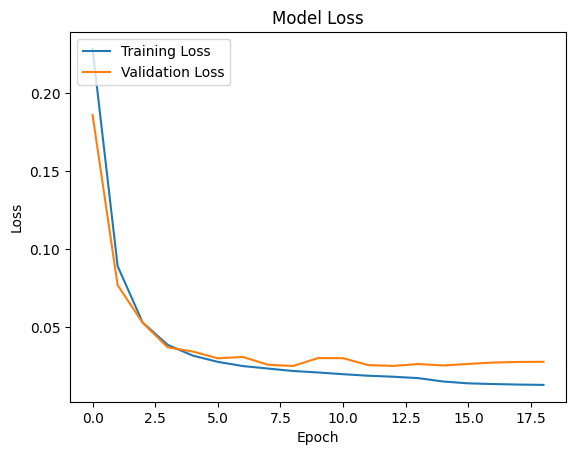

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
final_train_accuracy = results.history['accuracy'][-1]
final_val_accuracy = results.history['val_accuracy'][-1]
final_train_loss = results.history['loss'][-1]
final_val_loss = results.history['val_loss'][-1]

print(f'Training Accuracy: {final_train_accuracy}')
print(f'Training Loss: {final_train_loss}')
4
print(f'Validation Accuracy: {final_val_accuracy}')
print(f'Validation Loss: {final_val_loss}')

Training Accuracy: 0.9886622428894043
Training Loss: 0.013125238008797169
Validation Accuracy: 0.9849547147750854
Validation Loss: 0.0279474426060915


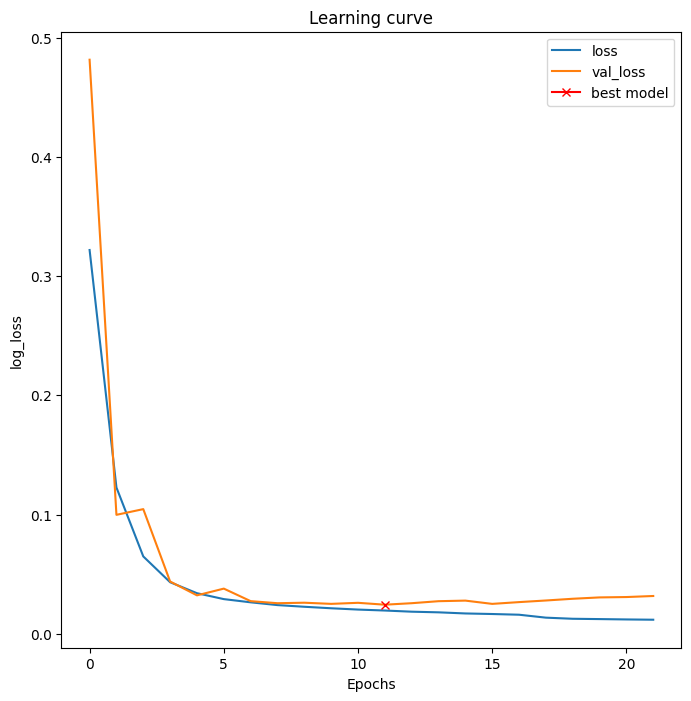

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend()

In [ ]:
model.load_weights('model_nerve.h5')

In [ ]:
model.evaluate(X_valid, y_valid, verbose=1)

18/18 [==============================] - 1s 30ms/step - loss: 0.0244 - accuracy: 0.9851


[0.024389661848545074, 0.985082745552063]

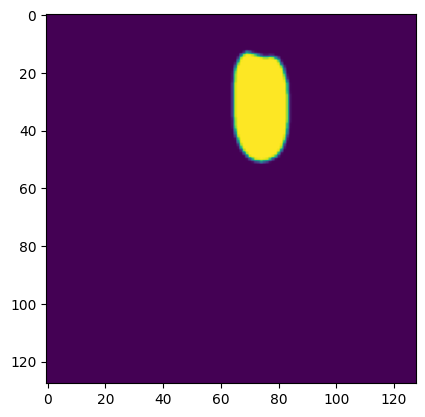

In [ ]:
plt.imshow(y_valid[0].squeeze())

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


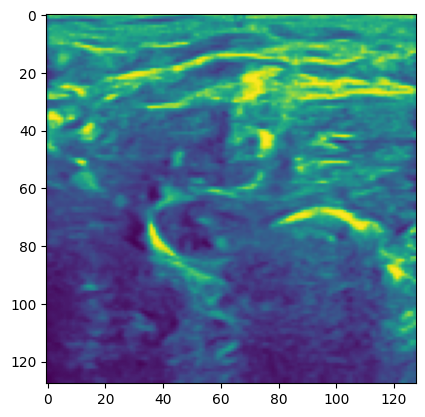

In [ ]:
img_name = '1000.tif'
img = tf.keras.preprocessing.image.load_img('/content/test/'+img_name , grayscale=True)
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze())

In [ ]:
prediction = model.predict(np.expand_dims(test , 0))

1/1 [==============================] - 2s 2s/step


In [ ]:
prediction.shape

(1, 128, 128, 1)

In [ ]:
prediction.squeeze().shape

(128, 128)

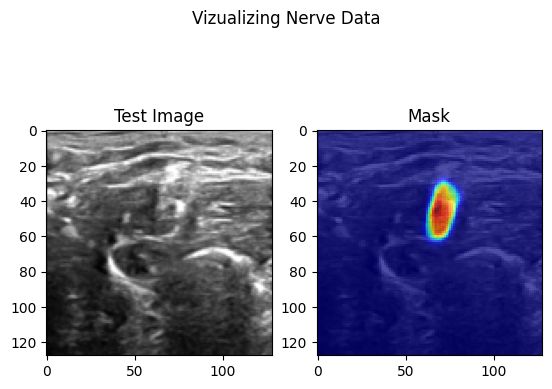

In [ ]:
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Vizualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()

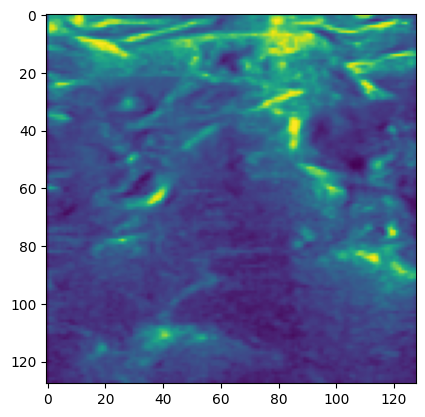

In [ ]:
img_name = '7.tif'
img = tf.keras.preprocessing.image.load_img('/content/test/'+img_name , grayscale=True)
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze())

In [ ]:
prediction = model.predict(np.expand_dims(test , 0))

1/1 [==============================] - 0s 20ms/step


In [ ]:
prediction.shape

(1, 128, 128, 1)

In [ ]:
prediction.squeeze().shape

(128, 128)

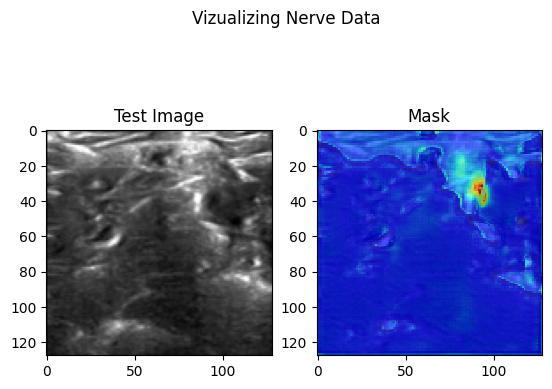

In [ ]:
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Vizualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()

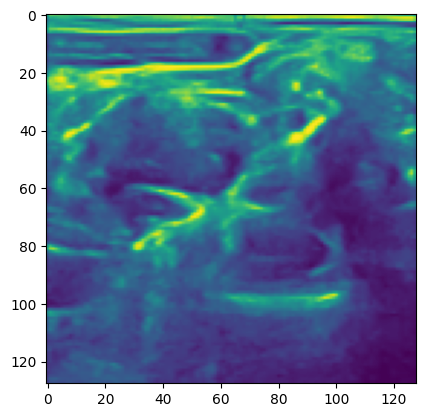

In [ ]:
img_name = '45.tif'
img = tf.keras.preprocessing.image.load_img('/content/test/'+img_name , grayscale=True)
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze())

In [ ]:
prediction = model.predict(np.expand_dims(test , 0))

1/1 [==============================] - 0s 33ms/step


In [ ]:
prediction.shape

(1, 128, 128, 1)

In [ ]:
prediction.squeeze().shape

(128, 128)

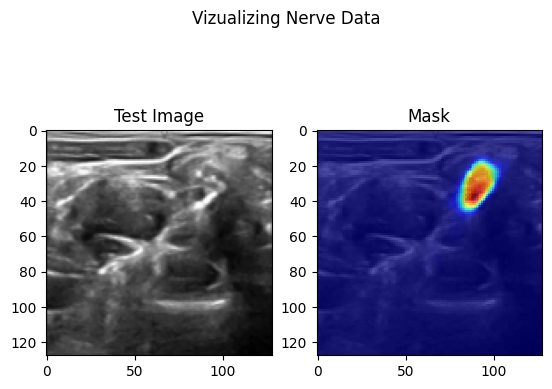

In [ ]:
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Vizualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()